# Matrix Methods Example - Frame 1
This is the same frame as solved using the method of slope-deflection
[here](../../slope-deflection/Slope-Deflection-Frame-1-Version-2.ipynb).

In [1]:
from __future__ import division, print_function
from IPython import display
import salib.nbloader    # so that we can directly import other notebooks

In [2]:
import Frame2D_v03 as f2d

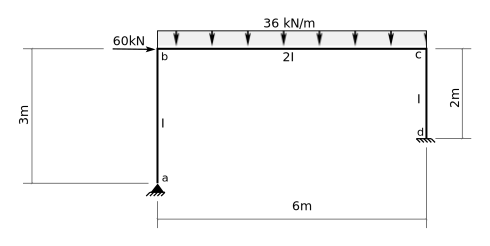

In [3]:
display.SVG('frame-1.d/frame-1.svg')

In [32]:
import sys
sys.path

['',
 '/usr/local/lib/python2.7/dist-packages/django_bitfield-1.7.1-py2.7.egg',
 '/usr/lib/python2.7/dist-packages',
 '/usr/local/lib/python2.7/dist-packages/Django-1.8.dev20141215194152-py2.7.egg',
 '/usr/local/lib/python2.7/dist-packages/python_docx-0.7.6-py2.7.egg',
 '/usr/local/lib/python2.7/dist-packages/keyring-5.4-py2.7.egg',
 '/usr/local/lib/python2.7/dist-packages/mercurial_keyring-0.6.7-py2.7.egg',
 '/files/home/nholtz/work/git/structural-analysis',
 '/files/home/nholtz/work/git/structural-analysis/matrix-methods/frame2d',
 '/usr/lib/python2.7',
 '/usr/lib/python2.7/plat-x86_64-linux-gnu',
 '/usr/lib/python2.7/lib-tk',
 '/usr/lib/python2.7/lib-old',
 '/usr/lib/python2.7/lib-dynload',
 '/usr/local/lib/python2.7/dist-packages',
 '/usr/lib/python2.7/dist-packages/PILcompat',
 '/usr/lib/python2.7/dist-packages/gtk-2.0',
 '/usr/lib/pymodules/python2.7',
 '/usr/lib/python2.7/dist-packages/wx-2.8-gtk2-unicode',
 '/usr/local/lib/python2.7/dist-packages/IPython/extensions',
 '/files/h

In [19]:
frame = f2d.Frame2D()

In [20]:
%%frame_data frame nodes
ID,X,Y
a,0,0
b,0,3000
c,6000,3000
d,6000,1000

In [21]:
%%frame_data frame members
ID,NODEJ,NODEK
ab,a,b
bc,b,c
cd,c,d

In [22]:
%%frame_data frame supports
ID,C0,C1,C2
a,FX,FY,
d,FX,FY,MZ

In [23]:
%%frame_data frame releases
ID,R

Use very large areas so that axial deformations will be very small so as to more closely replicate
the slope deflection analysis.

In [24]:
%%frame_data frame properties
ID,SIZE,Ix,A
bc,,200E6,100E10
ab,,100E6,
cd,,,

In [25]:
%%frame_data frame node_loads
ID,DIRN,F
b,FX,60000

In [26]:
%%frame_data frame member_loads
ID,TYPE,W1,W2,A,B,C
bc,UDL,-36,,,,

In [27]:
frame.doall()


ndof = 12, nfree = 7, nconstraints = 5



Nodes:

Node          X         Y  Constraints  DOF #s
----      -----     -----  -----------  ------
a             0         0  FX,FY        7,8,0
b             0      3000               1,2,3
c          6000      3000               4,5,6
d          6000      1000  FX,FY,MZ     9,10,11



Members:

Member   Node-J  Node-K    Length       dcx       dcy  Size                Ix           A  Releases
------   ------  ------    ------   -------   -------  --------      --------       -----  --------
ab       a       b         3000.0   0.00000   1.00000                   1e+08       1e+12  
bc       b       c         6000.0   1.00000   0.00000                   2e+08       1e+12  
cd       c       d         2000.0   0.00000  -1.00000                   1e+08       1e+12  



Node Loads:

Node  Dirn     Load
----  ----    -----
b     FX      60000

Member Loads:

Member  Load
------  ----------------
bc      UDL(L=6000.0,W1=-36)



Node Displacements

### Compare to slope-deflection solution:

The solutions as given in the
[slope-deflection example](../../slope-deflection/Slope-Deflection-Frame-1-Version-2.ipynb):

Member end forces:

```
{'Mab': 0,
 'Mba': 54.36,
 'Mbc': -54.36,
 'Mcb': 97.02,
 'Mcd': -97.02,
 'Mdc': -59.22,
 'Vab': -18.12,
 'Vdc': 78.12}
 ```
 
Except for a sign change, these seem consistent.  We might have a different sign convention here - I'll check into that.
 
 Reactions:
 
 ```
 [v.subs(soln).n(4) for v in [Ra,Ha,Rd,Hd,Md]]
 [100.9,18.12,115.1,−78.12,−59.22]
 ```
 
 and except for sign, these are OK as well.
 
 As for deflection, in $kN m^2$, the product $EI$ used here is:

In [28]:
EI = 200000. * 100E6 / (1000*1000**2)
EI

20000.0

and the lateral deflection of nodes $b$ and $c$ computed by slope-deflection, in $mm$, was:

In [29]:
(3528/(247*EI)) * 1000

0.71417004048583

which agrees with the displayed result, above.  (note that units in the slope-deflection example were
$kN$ and $m$ and here they are $N$ and $mm$).

## $P-\Delta$ Analysis
We wouldn't expect much difference as sidesway is pretty small:

In [30]:
frame.doall(pdelta=True)

iter=1, max D=0.713256922203, max chg=0.000913103731316, max % chg=0.128018909161
iter=2, max D=0.71325817901, max chg=1.256807456e-06, max % chg=0.000176206525629

ndof = 12, nfree = 7, nconstraints = 5



Nodes:

Node          X         Y  Constraints  DOF #s
----      -----     -----  -----------  ------
a             0         0  FX,FY        7,8,0
b             0      3000               1,2,3
c          6000      3000               4,5,6
d          6000      1000  FX,FY,MZ     9,10,11



Members:

Member   Node-J  Node-K    Length       dcx       dcy  Size                Ix           A  Releases
------   ------  ------    ------   -------   -------  --------      --------       -----  --------
ab       a       b         3000.0   0.00000   1.00000                   1e+08       1e+12  
bc       b       c         6000.0   1.00000   0.00000                   2e+08       1e+12  
cd       c       d         2000.0   0.00000  -1.00000                   1e+08       1e+12  



Node Loads:

